# Facebook Check ins Project

## Data Exploration

In [4]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

# make plots appear when you call them
%matplotlib inline 


In [19]:
traindf = pd.read_csv("train.csv")
print(traindf.head())
print(traindf.describe())


   row_id       x       y  accuracy    time    place_id
0       0  0.7941  9.0809        54  470702  8523065625
1       1  5.9567  4.7968        13  186555  1757726713
2       2  8.3078  7.0407        74  322648  1137537235
3       3  7.3665  2.5165        65  704587  6567393236
4       4  4.0961  1.1307        31  472130  7440663949
             row_id             x             y      accuracy          time  \
count  2.911802e+07  2.911802e+07  2.911802e+07  2.911802e+07  2.911802e+07   
mean   1.455901e+07  4.999770e+00  5.001814e+00  8.284912e+01  4.170104e+05   
std    8.405649e+06  2.857601e+00  2.887505e+00  1.147518e+02  2.311761e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00   
25%    7.279505e+06  2.534700e+00  2.496700e+00  2.700000e+01  2.030570e+05   
50%    1.455901e+07  5.009100e+00  4.988300e+00  6.200000e+01  4.339220e+05   
75%    2.183852e+07  7.461400e+00  7.510300e+00  7.500000e+01  6.204910e+05   
max    2.911802e+07  1.000000e+0

In [15]:
print("Unique places:"+ str(traindf.place_id.unique().size))
print("Avg samples per places:" +str(len(traindf)/float(traindf.place_id.unique().size)))


Unique places:108390
Avg samples per places:268.6412122889565


In [9]:
#do visualizations with a random sample of the data 
df_train_sample = traindf.sample(n=1000000)

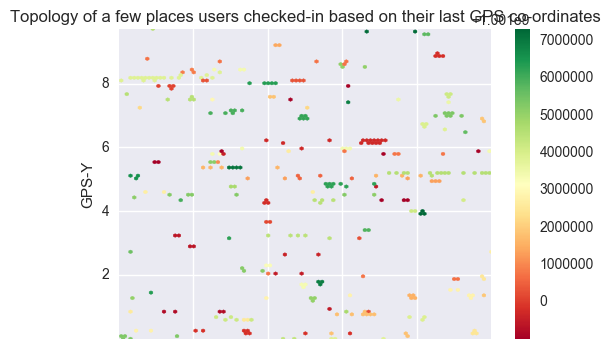

In [40]:
#modified from Kernal by yrevar
df_train_graph_sample = df_train_sample.sort_values(by="place_id")[:1000].copy()
ax = df_train_graph_sample.plot(kind='hexbin', x='x', y='y', C='place_id', colormap='RdYlGn')
ax.set_xlabel("GPS-X")
ax.set_ylabel("GPS-Y")
ax.set_title("Topology of a few places users checked-in based on their last GPS co-ordinates")


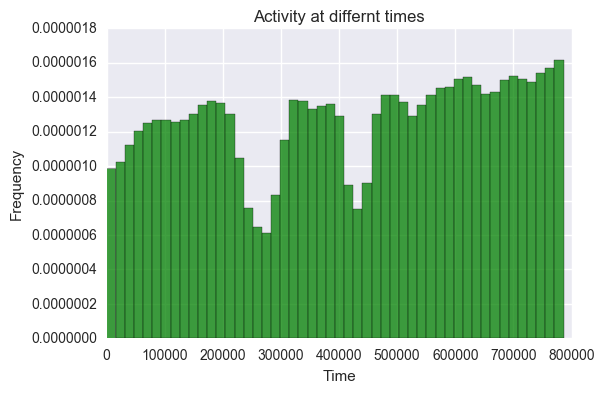

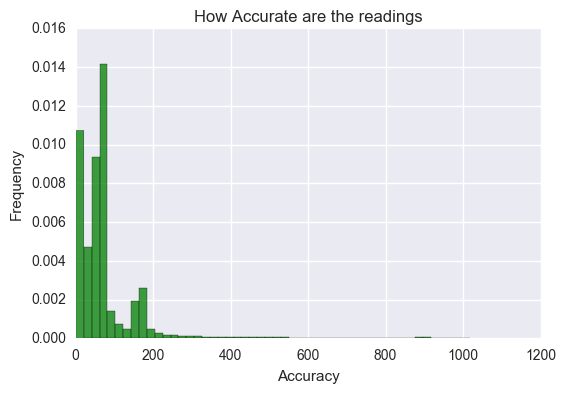

In [30]:
n, bins, patches = plt.hist(df_train_sample['time'], 50, normed=1, facecolor='green', alpha=0.75)
plt.title('Activity at differnt times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

n, bins, patches = plt.hist(df_train_sample['accuracy'], 50, normed=1, facecolor='green', alpha=0.75)
plt.title('How Accurate are the readings')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()



In [34]:
print(df_train_sample.query('place_id == 7027539516').x.describe())
print(df_train_sample.query('place_id == 7027539516').y.describe())


count    27.000000
mean      6.414381
std       0.059946
min       6.225600
25%       6.389750
50%       6.414500
75%       6.457900
max       6.517800
Name: x, dtype: float64
count    27.000000
mean      3.105052
std       0.008730
min       3.088600
25%       3.099900
50%       3.106000
75%       3.109600
max       3.121100
Name: y, dtype: float64


For check-ins to the this location, it seems like X has a larger spread than Y. This trend seems to be true for most locations:

In [55]:
x_var, y_var, n = 0, 0, 10
for x in range(n):
    place_id = df_train_sample.place_id.unique()[x]
    df_place = df_train_sample[df_train_sample["place_id"]==place_id]
    x_var += df_place["x"].var()
    y_var += df_place["y"].var()
print("variance in x(%) " + str(x_var*100/n))
print("variance in y(%) " + str(y_var*100/n))

variance in x(%) 22.415886574377435
variance in y(%) 0.011034970096505023


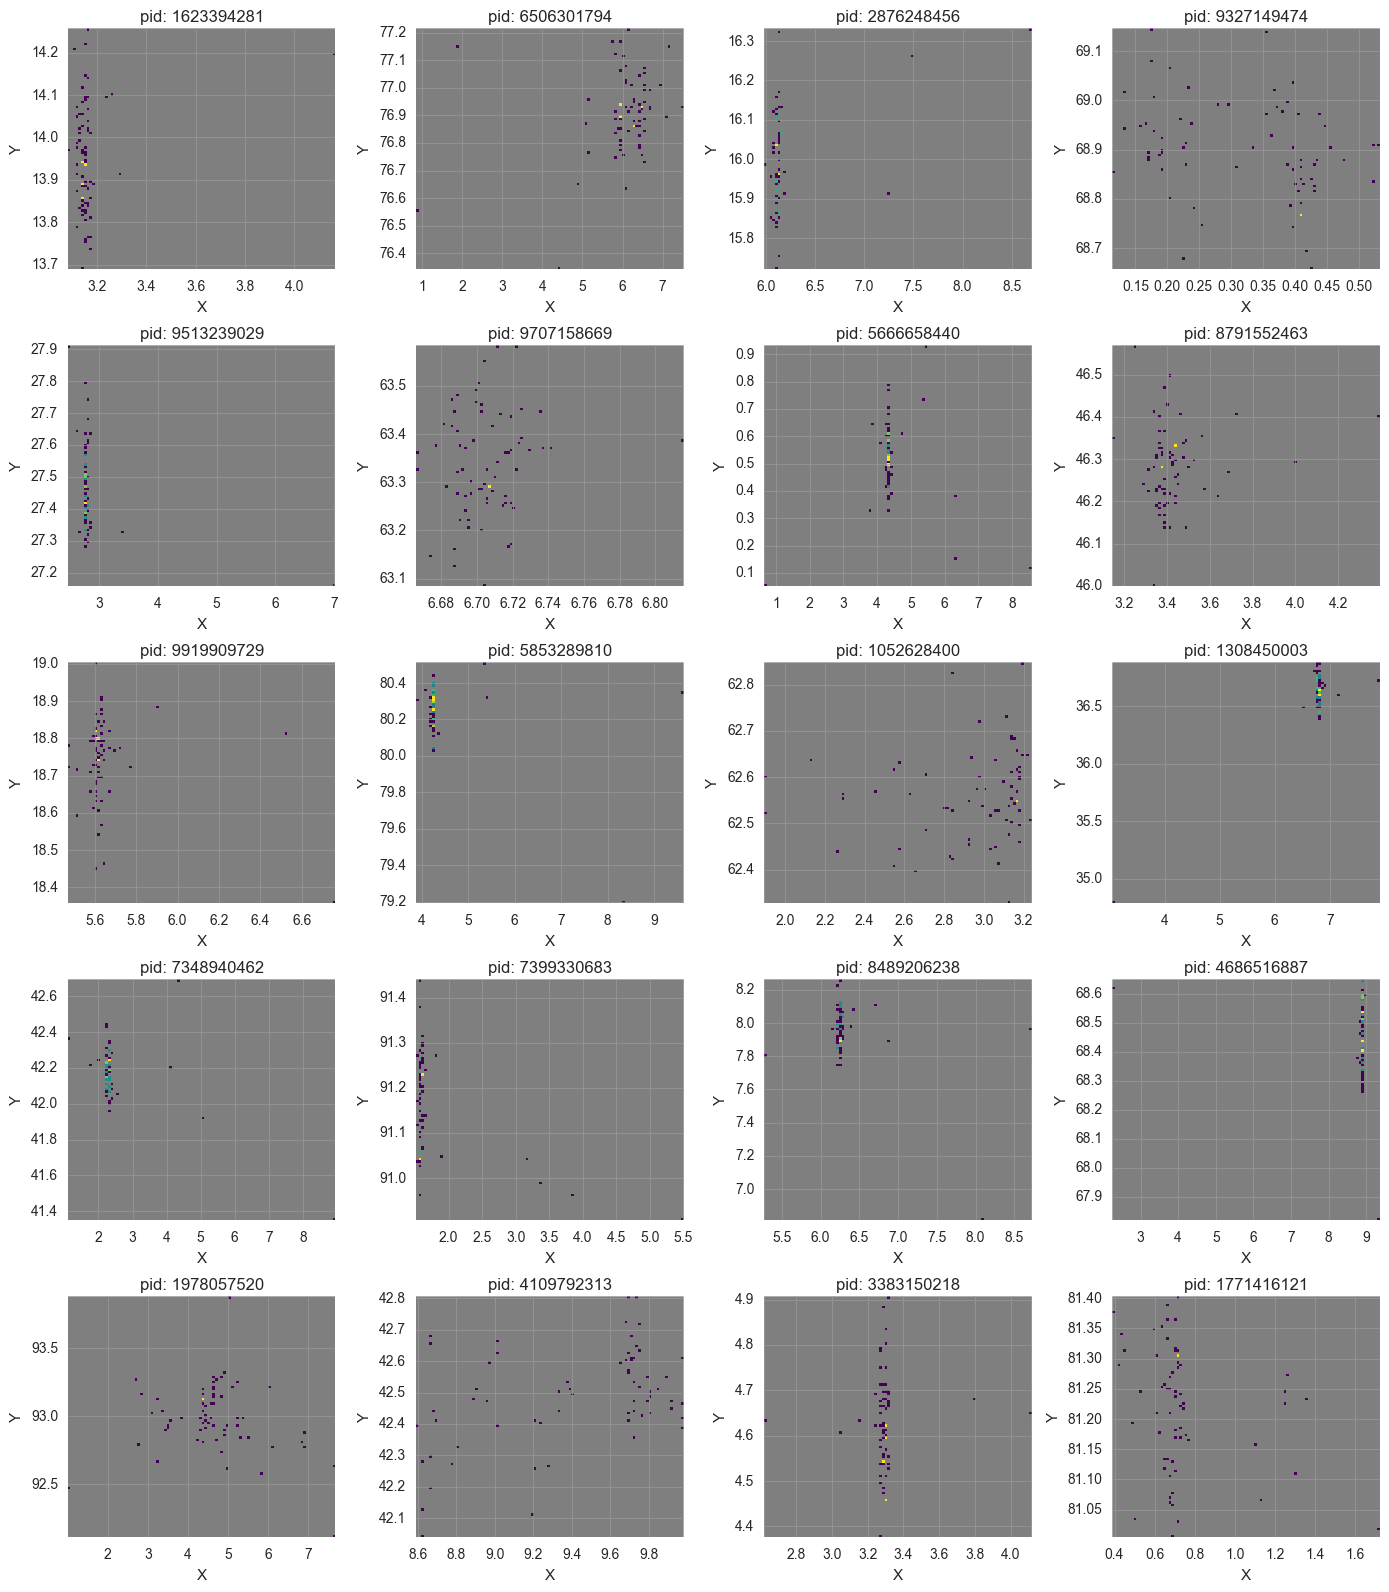

In [60]:
#Modified from Kernel by TusharGupta 
df_placecounts = df_train_sample["place_id"].value_counts()
df_topplaces = df_placecounts.iloc[0:20]
l_topplaces = list(df_topplaces.index)

plt.figure(10, figsize=(14,16))
cmapm = plt.cm.viridis
cmapm.set_bad("0.5",1.)

for i in range(len(l_topplaces)):
    place = l_topplaces[i]
    df_place = df_train_sample[df_train_sample["place_id"]==place]
    counts, binsX, binsY = np.histogram2d(df_place["x"], df_place["y"] *10 , bins=100)
    extent = [binsX.min(),binsX.max(),binsY.min(),binsY.max()]

    plt.subplot(5,4,i+1)
    plt.imshow(np.log10(counts.T),
               interpolation='none',
               origin='lower',
               extent=extent,
               aspect="auto",
               cmap=cmapm)
    plt.grid(True, c='0.6', lw=0.5)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("pid: " + str(place))

plt.tight_layout()
plt.show()


Again, for the top 20 cases, we see how spread out it is in the X direction compared to the y direction (notice how small the scale is in the y direction).